In [1]:
!pwd

/content


In [2]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2021-09-13 23:51:34--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.005s  

2021-09-13 23:51:35 (75.4 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



type: <class 'numpy.ndarray'>, shape: (633, 806, 3)


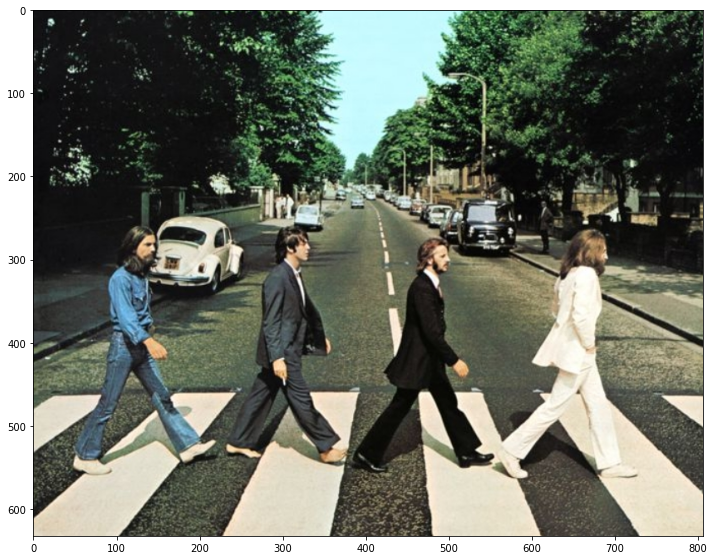

In [3]:
# 데이터 시각화
import cv2
import matplotlib.pyplot as plt
%matplotlib inline



img = cv2.imread('./data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"type: {type(img_rgb)}, shape: {img.shape}")
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(img_rgb)

plt.show()

## Tensorflow 모델 로딩

In [4]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

mkdir: cannot create directory ‘./pretrained’: File exists
--2021-09-13 23:51:35--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.15.112, 2607:f8b0:4004:811::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.15.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M   243MB/s    in 1.5s    

2021-09-13 23:51:37 (243 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-09-13 23:51:37--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.

In [5]:
# 압축 해제
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [6]:
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

total 296076
6029320 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
6029317 drwxr-xr-x 3 root   root      4096 Sep 13 23:40 ..
6029468 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
6029476 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
6029471 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
6029321 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
6029472 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
6029470 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
6029473 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


In [7]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')

## 카테고리 레이블 값

In [8]:
# OpenCV Tensorflow Faster-RCNN용
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

## Image Object Detection

In [9]:
img.shape

(633, 806, 3)

(1, 1, 100, 7)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012


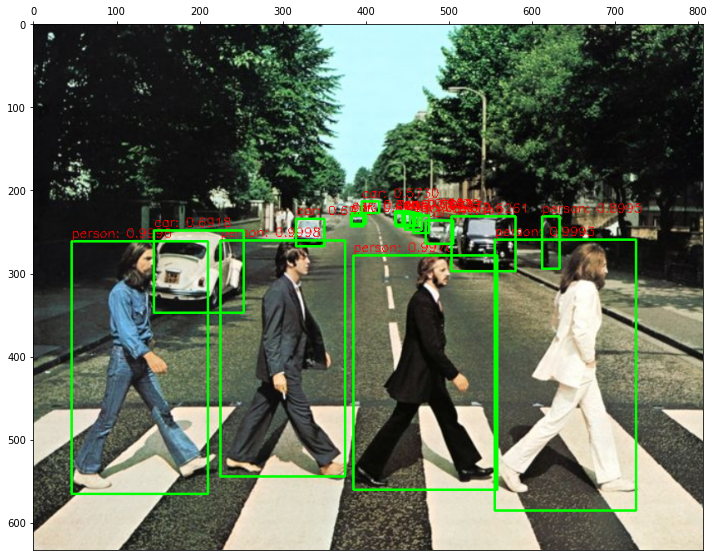

In [10]:
# 원본 이미지가 Faster RCNN기반 네트웍으로 입력 시 resize됨.
# scaling된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 복원하기 위해 원본 이미지 shape정보가 필요
rows = img.shape[0]
cols = img.shape[1]

draw_img = img.copy()

# BGR -> RGB, Tensorflow Faster RCNN은 마지막 classification layer가 Dense가 아니여서 size를 고정할 필요는 없음
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))

# Detection 결과
cv_out = cv_net.forward()
print(cv_out.shape) # [의미없음, class_id, 확률, xmin, ymin, xmax, ymax]

# bounding box 글자색 지정
green_color = (0, 255, 0)
red_color = (0, 0, 255)

# detected 된 object들을 iteration 하면서 정보 추출
for detection in cv_out[0, 0, :, :]:
    score = float(detection[2])
    class_id = int(detection[1])
    # score가 0.5 이상만 추출
    if score > 0.5:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows

        # labels_to_names_seq 딕셔너리로 class_id값을 클래스명으로 변경
        caption = f"{labels_to_names_0[class_id]}: {score:.4f}"
        print(caption)
        
        # cv2.rectangle() 위치 인자는 정수형이다.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color=red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(bottom=False, labelbottom=False,
               top=True, labeltop=True)
ax.imshow(img_rgb)
plt.show()

In [11]:
# 하나의 image Object Detection 수행 함수
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 함수 인자로 들어온 score_threshold 이상만 추출
        if score > score_threshold:
            # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = f"{labels_to_names_0[class_id]}: {score:.4f}"
            print(caption)
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

image shape: (633, 806, 3)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012
Detection 수행시간: 7.67 초


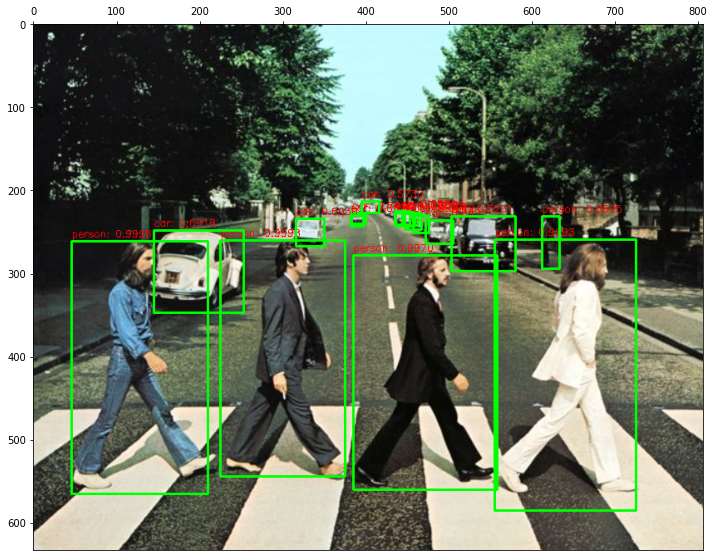

In [12]:
# image 로드 
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(bottom=False, labelbottom=False,
               top=True, labeltop=True)
ax.imshow(img_rgb)
plt.show()

In [13]:
# 다른 image 테스트
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-09-13 23:52:02--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.002s  

2021-09-13 23:52:02 (35.6 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



image shape: (476, 735, 3)
person: 0.9998
person: 0.9997
person: 0.9977
sports ball: 0.8867
baseball bat: 0.8420
baseball glove: 0.9815
Detection 수행시간: 6.85 초


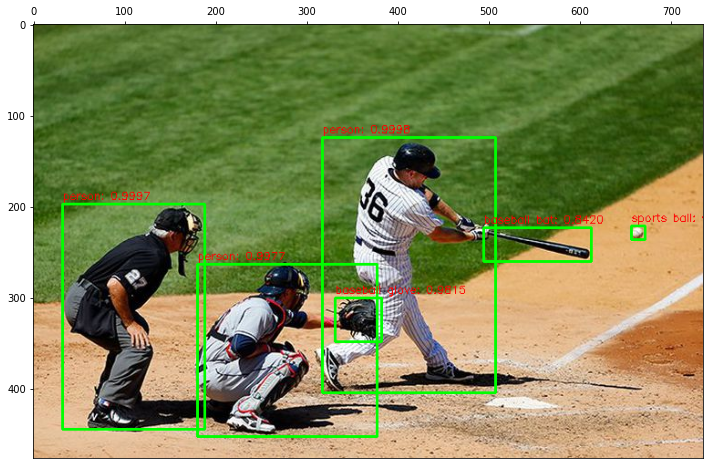

In [15]:
img = cv2.imread('./data/baseball01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(bottom=False, labelbottom=False,
               top=True, labeltop=True)
ax.imshow(img_rgb)
plt.show()

## Video Object Detection

In [16]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-09-13 23:55:47--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-09-13 23:55:48--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-09-13 23:55:48--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [18]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'
video_output_path = './data/Jonh_Wick_small_detected.mp4'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size= (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"총 Frame 갯수: {frame_cnt}")

총 Frame 갯수: 58


In [20]:
# 개별 frame별로 단일 이미지 Object Detection수행

green_color = (0, 255, 0) # bounding box 색
red_color = (0, 0, 255) # 글자 색

while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더이상 처리할 frame이 없습니다.')
        break
    
    rows = img_frame.shape[0]
    cols = img_frame.shape[1]

    # BGR -> RGB 변환 하여 입력
    cv_net.setInput(cv2.dnn.blobFromImage(img_frame, swapRB=True, crop=False))

    start = time.time()

    # Object Detection
    cv_out = cv_net.forward()
    
    for detection in cv_out[0, 0, :, :]:
        score = float(detection[2])
        class_id = int(detection[1])

        if score > 0.5:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = f"{labels_to_names_0[class_id]}: {score:.4f}"

            cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color=red_color, thickness=1)
    print(f"Detection 수행시간: {round(time.time()-start, 2)}초")
    vid_writer.write(img_frame)

vid_writer.release()
cap.release()

Detection 수행시간: 7.66초
Detection 수행시간: 7.57초
Detection 수행시간: 7.65초
Detection 수행시간: 7.69초
Detection 수행시간: 7.57초
Detection 수행시간: 7.66초
Detection 수행시간: 7.65초
Detection 수행시간: 7.7초
Detection 수행시간: 7.66초
Detection 수행시간: 7.64초
Detection 수행시간: 7.62초
Detection 수행시간: 7.6초
Detection 수행시간: 7.62초
Detection 수행시간: 7.62초
Detection 수행시간: 7.66초
Detection 수행시간: 7.64초
Detection 수행시간: 7.68초
Detection 수행시간: 7.68초
Detection 수행시간: 7.61초
Detection 수행시간: 7.6초
Detection 수행시간: 7.61초
Detection 수행시간: 7.67초
Detection 수행시간: 7.59초
Detection 수행시간: 7.63초
Detection 수행시간: 7.61초
Detection 수행시간: 7.68초
Detection 수행시간: 7.62초
Detection 수행시간: 7.61초
Detection 수행시간: 7.59초
Detection 수행시간: 7.69초
Detection 수행시간: 7.62초
Detection 수행시간: 7.56초
Detection 수행시간: 7.55초
Detection 수행시간: 7.63초
Detection 수행시간: 7.62초
Detection 수행시간: 7.61초
Detection 수행시간: 7.56초
Detection 수행시간: 7.54초
Detection 수행시간: 7.58초
Detection 수행시간: 7.68초
Detection 수행시간: 7.62초
Detection 수행시간: 7.64초
Detection 수행시간: 7.58초
Detection 수행시간: 7.66초
Detection 수행시간: 7.57초
Detection 수행시

In [21]:
# video detection 전용 함수 생성
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print=is_print)
        
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [22]:
do_detected_video(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.2, False)

총 Frame 갯수: 58
person: 0.9495
person: 0.2871
bicycle: 0.3498
car: 0.9882
car: 0.9622
car: 0.9266
car: 0.8772
car: 0.3988
car: 0.3763
car: 0.2583
car: 0.2150
motorcycle: 0.6607
book: 0.2069
person: 0.9581
person: 0.4459
person: 0.2940
bicycle: 0.4216
car: 0.9881
car: 0.9643
car: 0.9318
car: 0.8992
car: 0.4418
car: 0.4189
car: 0.2545
car: 0.2318
motorcycle: 0.5682
person: 0.7814
person: 0.5169
person: 0.3087
car: 0.9903
car: 0.9833
car: 0.9115
car: 0.8625
car: 0.4893
car: 0.4251
motorcycle: 0.9532
airplane: 0.2046
person: 0.7585
person: 0.7484
person: 0.7375
person: 0.7200
person: 0.3580
person: 0.2285
person: 0.2171
car: 0.9919
car: 0.9909
car: 0.9870
car: 0.7361
car: 0.6120
motorcycle: 0.8655
umbrella: 0.4362
person: 0.5313
person: 0.4869
person: 0.4709
car: 0.9933
car: 0.9817
car: 0.9530
car: 0.7823
car: 0.2064
motorcycle: 0.9781
truck: 0.4717
person: 0.8299
person: 0.4792
person: 0.2719
car: 0.9799
car: 0.9678
car: 0.9496
car: 0.6521
car: 0.4466
car: 0.4120
car: 0.2396
car: 0.2354
ca